In [7]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import wget
%matplotlib inline

In [12]:
image = cv2.imread(wget.download('https://i.imgur.com/EoyIwHp.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

100% [............................................................................] 649437 / 649437

(2000, 2666, 3)

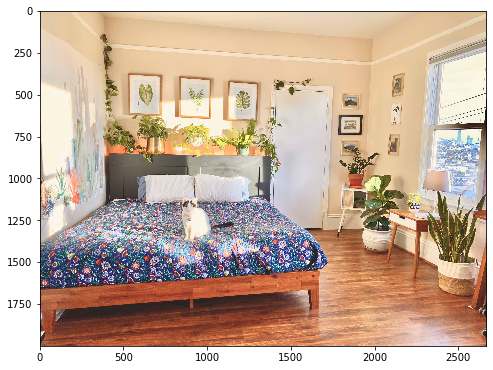

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(image)

In [14]:
resized_image = cv2.resize(image, (1000, 1000))
resized_image.shape

(1000, 1000, 3)

In [15]:
def RGB2HEX(color):
    ''' Converting RGB values into their equivalent HEXs'''
    
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [16]:
def modify_image(img):
    ''' Reshaping the img to feed into the KMeans'''
    return img.reshape(img.shape[0] * img.shape[1], 3)

In [18]:
modified_img = modify_image(resized_image)
modified_img.shape

(1000000, 3)

In [19]:
from sklearn.cluster import KMeans

In [21]:
num_colors = 10
clf = KMeans(n_clusters=num_colors)
labels = clf.fit_predict(modified_img)

In [22]:
from collections import Counter

In [23]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

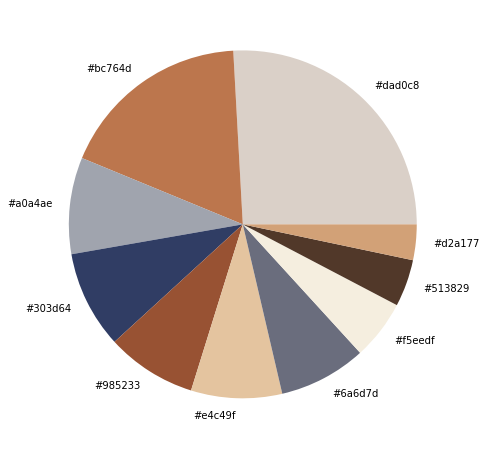

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
plt.show()

### Putting it together as a function

In [35]:
def load_img(img_path):
    return cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

In [36]:
def extract(img_path, num_colors=5):
    img = load_img(img_path)
    resized_img = cv2.resize(img, (int(img.shape[0]/2), int(img.shape[1]/2)))
    print('* Resized to: ', resized_img.shape)
    modified_image = modify_image(resized_img)
    print('* Shape for clustering: ', modified_image.shape)
    
    print('* Clustering.. ')
    clf = KMeans(n_clusters=num_colors)
    labels = clf.fit_predict(modified_img)
    
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
    plt.title('Extracted Colors')
    plt.tight_layout()

* Resized to:  (460, 371, 3)
* Shape for clustering:  (170660, 3)
* Clustering.. 


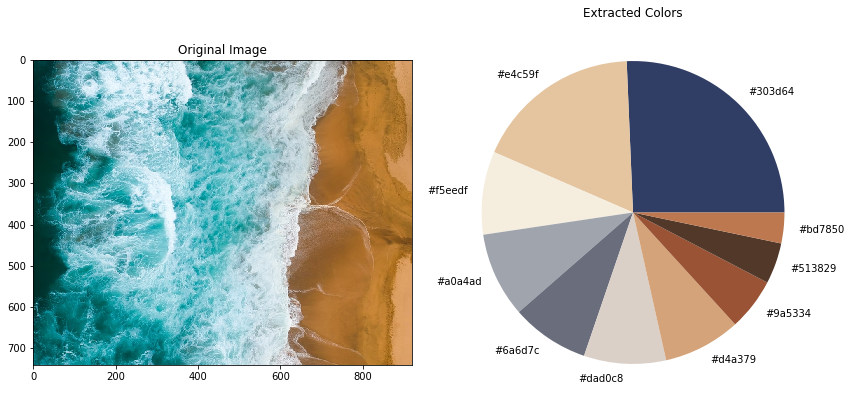

In [39]:
extract('waves.jpg', num_colors=10)

<strong> Credits to https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71 for this extremely clever way to extract colors. </strong>